# PBMC

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE96583

https://drive.google.com/uc?id=1r87vhoLLq6PXAYdmyyd89zG90eJOFYLk

In [1]:
import scanpy as sc
import numpy as np
from ndreamer import NDreamer

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 16893 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'
(array(['control', 'stimulated'], dtype=object), array([8007, 8886]))
condition ['control' 'stimulated']
cell_type ['B' 'CD14+Mono' 'CD4T' 'CD8T' 'Dendritic' 'FCGR3A+Mono' 'NK']
  (0, 6)	3.206646203994751
  (0, 7)	0.9476891756057739
  (1, 6)	3.3140597343444824
  (2, 6)	2.344876527786255
  (3, 6)	2.292093276977539
  (4, 6)	2.430964708328247
  (5, 3)	0.29651933908462524
  (5, 6)	3.045463800430298
  (6, 6)	2.0396549701690674
  (7, 6)	3.98563814163208
  (8, 5)	0.5871325731277466
  (8, 6)	4.5311431884765625
  (9, 6)	2.4054837226867676


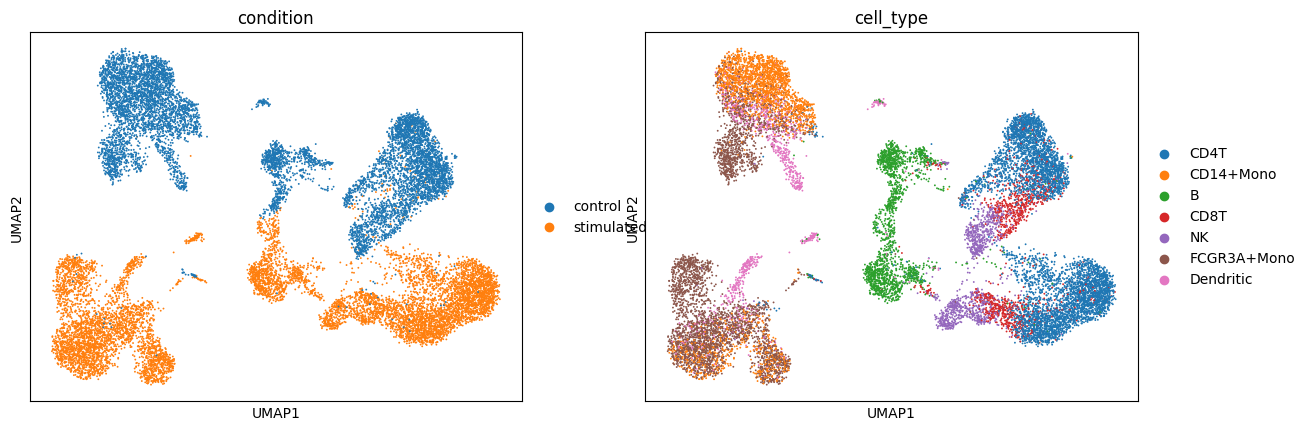

In [2]:
adata = sc.read_h5ad('../data/PBMC.h5ad')
print(adata)
print(np.unique(adata.obs['condition'],return_counts=True))
print('condition',np.unique(adata.obs['condition']))
#print('batch',np.unique(adata.obs['batch']))
print('cell_type',np.unique(adata.obs['cell_type']))
print(adata.X[:10,:10])
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["condition",'cell_type'])

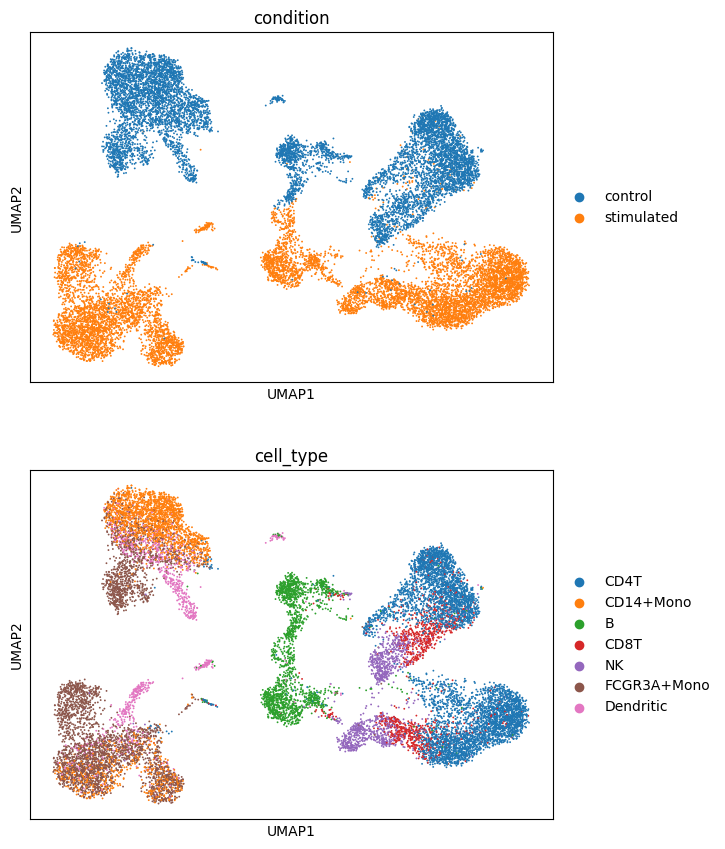

In [4]:
sc.pl.umap(adata, color=["condition",'cell_type'],ncols=1)

In [3]:
model = NDreamer(adata, condition_key="condition", contorl_name='control', num_hvg=2000, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./PBMC/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./PBMC/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

Start data preprocessing
Original adata.obs[condition_key] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'control': 0, 'stimulated': 1}
Condition mapping to adata.obs['batch']: {0: 0}
Calculating the clusters
Unique groups: ['0_0' '0_1']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:38: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  clustering_function(adata, resolution=resolution1)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:100: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = clustered_adatas[0].concatenate(*clustered_adatas[1:], batch_key="batch_condition",


Finished clustering
Data preprocessing done
Remaining number of cells: 16893
Too few epoches (steps, if rigorously speaking). Changing epoch to 178 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {0: 0}
Condition name to number mapping (may be used for search for saved adata):
 {'control': 0, 'stimulated': 1}
Preprocessing time: 44.07342 seconds


Overall Progress:   0%|          | 0/178 [00:00<?, ?it/s]

Resetting 2001 unused embeddings.
Resetting 1996 unused embeddings.
Resetting 2000 unused embeddings.
Resetting 1999 unused embeddings.
Resetting 2013 unused embeddings.
Resetting 1986 unused embeddings.
Resetting 2023 unused embeddings.
Resetting 1994 unused embeddings.
Resetting 2009 unused embeddings.
Resetting 2006 unused embeddings.
Resetting 2005 unused embeddings.
Resetting 2015 unused embeddings.
Resetting 2010 unused embeddings.
Resetting 2020 unused embeddings.
Resetting 2013 unused embeddings.
Resetting 2022 unused embeddings.
Resetting 2014 unused embeddings.
Resetting 2004 unused embeddings.
Resetting 2019 unused embeddings.
Resetting 2006 unused embeddings.
Resetting 2014 unused embeddings.
Resetting 2009 unused embeddings.
Resetting 2017 unused embeddings.
Resetting 2000 unused embeddings.
Resetting 2022 unused embeddings.
Resetting 2018 unused embeddings.
Resetting 2010 unused embeddings.
Resetting 2013 unused embeddings.
Resetting 2020 unused embeddings.
Resetting 1995

In [4]:
adata1=model.DL_model.adata.copy()

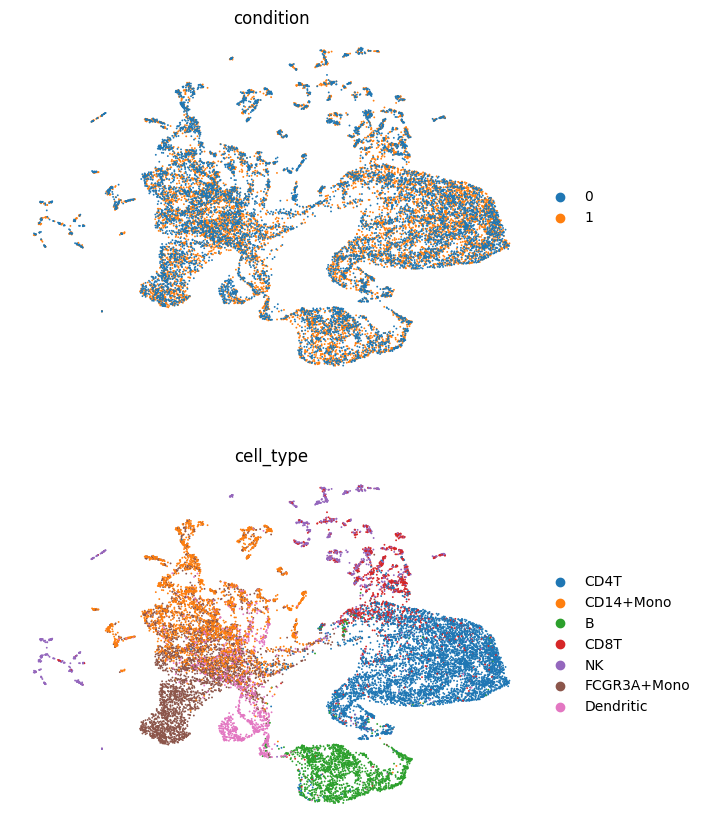

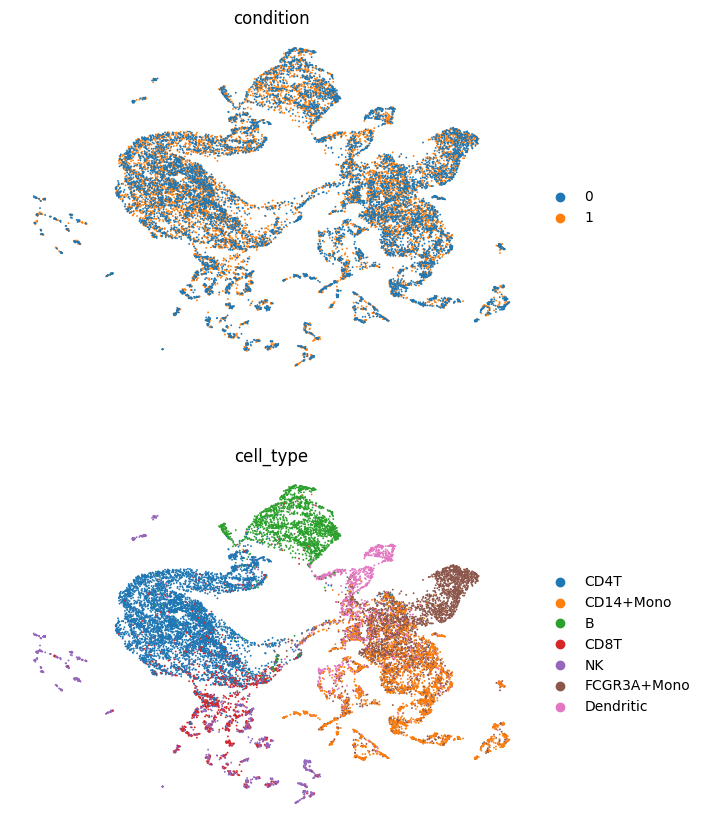

In [5]:
adata1=sc.read_h5ad("./PBMC/adata.h5ad")
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['condition', 'cell_type'], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['condition', 'cell_type'], frameon=False, ncols=1)

In [6]:
import rpy2.robjects as robjects
import os
os.environ["R_HOME"]="/home/xx244/.conda/envs/benchmark/lib/R"
import anndata2ri
anndata2ri.activate()

from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.
/tmp/ipykernel_1422113/4050021161.py:5: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


R_HOME is already set to: /home/xx244/.conda/envs/benchmark/lib/R


/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


LISI---
cLISI, bLISI, LISI_F1 0.9172070753129777 0.7484976282936442 0.8243085572603944
ASW---
asw_label 0.5892292559146881
asw_batch 0.9362945852671455
kBET---
0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7

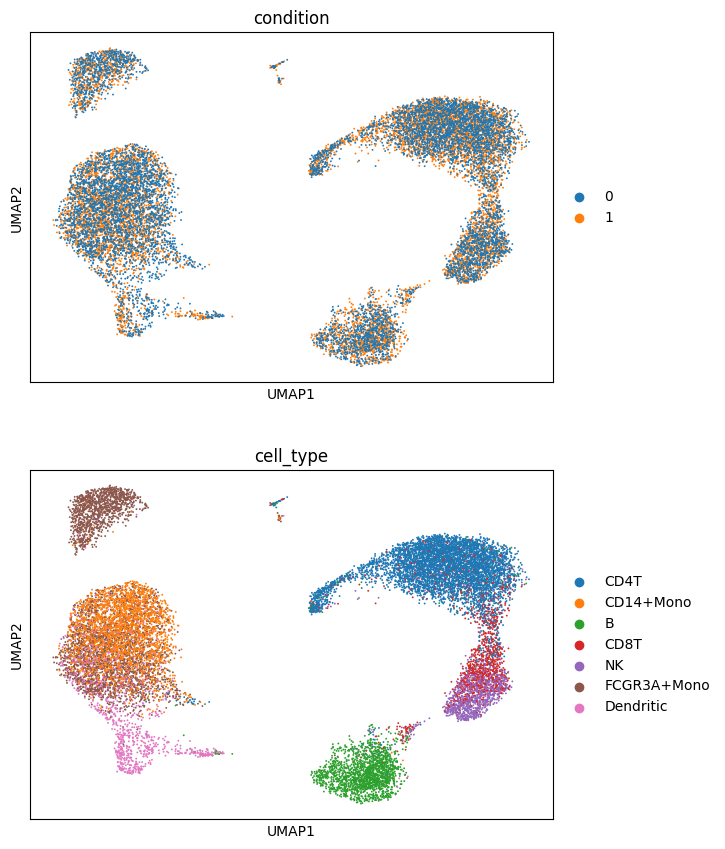

In [3]:
import scanpy as sc

adata1 = sc.read_h5ad('./PBMC/adata.h5ad')
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=15)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['condition', 'cell_type'], ncols=1)